In [ ]:
# SkinMatch
import pandas as pd
import numpy as np

pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_rows", 50)

In [ ]:
# Load the raw data into Github
url = "https://raw.githubusercontent.com/rainyliurunlin/SkinMatch/refs/heads/main/skincare_ingredients.csv"

try:
    df = pd.read_csv(url)
except UnicodeDecodeError:
    df = pd.read_csv(url, encoding="latin-1")

df.head()

,Label,brand,name,price,rank,ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolatum, Glycerin, Isohexadecane, Microcrystalline Wax, Lanolin Alcohol, Citrus Aurantifolia (Lime) Extract, Sesamum Indicum (Sesame) Seed Oil, Eucalyptus ...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butylene Glycol, Pentylene Glycol, Water, Sodium Benzoate, Methylparaben, Sorbic Acid.",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Cetearyl Alcohol, Cetearyl Olivate, Sorbitan Olivate, Sclerocarya Birrea Seed Oil, Bacillus/Soybean/ Folic Acid Ferment Extract, Nymphaea Alba Root Extract, ...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, Petrolatum, Glyceryl Distearate, Phenyl Trimethicone, Butylene Glycol, Hydrogenated Vegetable Oil, Cholesterol, Butyrospermum Parkii (Shea Butter), Ste...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimethicone, Dimethicone, Butylene Glycol, Butylene Glycol Dicaprylate/Dicaprate, Orbignya Oleifera Seed Oil, Butyloctyl Salicylate, Cetyl Peg/Ppg-10/1 Dim...",1,1,1,1,1


In [ ]:
# The info of dataset before cleaning
print(df.shape)
print(df.columns)

df.info()

# Check random rows
df.sample(5, random_state=42)

(1472, 11)
Index(['Label', 'brand', 'name', 'price', 'rank', 'ingredients', 'Combination',
       'Dry', 'Normal', 'Oily', 'Sensitive'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   brand        1472 non-null   object 
 2   name         1472 non-null   object 
 3   price        1472 non-null   int64  
 4   rank         1472 non-null   float64
 5   ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


,Label,brand,name,price,rank,ingredients,Combination,Dry,Normal,Oily,Sensitive
852,Face Mask,SK-II,Overnight Miracle Mask,105,3.8,"Galactomyces Ferment Filtrate*, Water, Glycerin, Butylene Glycol, Xylitol, Dipropylene Glycol, Cyclopentasiloxane, Dimethicone, Fragrance, Aluminum Starch Octenylsuccinate, Acrylates/C10-30 Alkyl ...",1,1,1,1,1
184,Moisturizer,ESTÉE LAUDER,Advanced Time Zone Night Age Reversing Line/Wrinkle Crème,80,4.7,"Adv Timezone Night Age Rvr Lw Crm Division: El (Estee Lauder)Ingredients: Water , Bis-Diglyceryl Polyacyladipate-2 , Hdi/Ppg/Polycaprolactone Crosspolymer , Simmondsia Chinensis (Jojoba) Seed Oil ...",0,0,0,0,0
1261,Eye cream,PETER THOMAS ROTH,FIRMx™ 360 Eye Renewal,75,4.0,"-Nutrex EGF\r\r\n-Epidermosil™\r\r\n-Eye Regener™\r\r\n-Diamond Powder\r\r\nWater, Glycerin, Adipic Acid/Neopentyl Glycol Crosspolymer, Butylene Glycol, Avena Sativa (Oat) Kernel Extract, rh-Oligo...",1,1,1,1,0
67,Moisturizer,SMASHBOX,Camera Ready BB Cream SPF 35,42,4.0,"Water, Dimethicone, Butylene Glycol, Phenyl Trimethicone, Pentylene Glycol, Glyceryl Stearate, Behenyl Alcohol, Trioctyldodecyl Citrate, Polymethylsilsesquioxane, Octyldodecyl Stearoyl Stearate, P...",0,0,0,0,0
220,Moisturizer,CLINIQUE,Moisture Surge Overnight Mask,35,4.5,"Water , Glycerin , Cetyl Alcohol , Dimethicone , Glyceryl Polymethacrylate , Butyrospermum Parkii (Shea Butter) , Cetyl Ethylhexanoate , Peg-8 , Glycereth-26 , Sucrose , Sorbitan Stearate , Peg-10...",0,0,0,0,0


In [ ]:
# Copy to avoid changing the raw data
df_clean = df.copy()

# 1. Remove those without ingredients info
df_clean = df_clean[~df_clean["ingredients"].isna()]

# 2. Remove the price that is empty or can't be transformed
df_clean["price"] = pd.to_numeric(df_clean["price"], errors="coerce")
df_clean = df_clean[~df_clean["price"].isna()]

# 3. Drop the duplicates
df_clean = df_clean.drop_duplicates(subset=["brand", "name"])

# 4. Unify the names of columns
df_clean.columns = [c.strip() for c in df_clean.columns]

# The info of dataset after cleaning
df_clean.info()
print(df_clean.shape)
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   brand        1472 non-null   object 
 2   name         1472 non-null   object 
 3   price        1472 non-null   int64  
 4   rank         1472 non-null   float64
 5   ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB
(1472, 11)


,Label,brand,name,price,rank,ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolatum, Glycerin, Isohexadecane, Microcrystalline Wax, Lanolin Alcohol, Citrus Aurantifolia (Lime) Extract, Sesamum Indicum (Sesame) Seed Oil, Eucalyptus ...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butylene Glycol, Pentylene Glycol, Water, Sodium Benzoate, Methylparaben, Sorbic Acid.",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Cetearyl Alcohol, Cetearyl Olivate, Sorbitan Olivate, Sclerocarya Birrea Seed Oil, Bacillus/Soybean/ Folic Acid Ferment Extract, Nymphaea Alba Root Extract, ...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, Petrolatum, Glyceryl Distearate, Phenyl Trimethicone, Butylene Glycol, Hydrogenated Vegetable Oil, Cholesterol, Butyrospermum Parkii (Shea Butter), Ste...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimethicone, Dimethicone, Butylene Glycol, Butylene Glycol Dicaprylate/Dicaprate, Orbignya Oleifera Seed Oil, Butyloctyl Salicylate, Cetyl Peg/Ppg-10/1 Dim...",1,1,1,1,1


In [ ]:
def normalize_ingredients(text: str) -> str:
    """
    Standardize the raw ingredients string:
      - Convert to lowercase
      - Replace line breaks with spaces
      - Remove the extra spaces
    """
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = text.replace("\n", " ")
    text = " ".join(text.split())
    return text

df_clean["ingredients_clean"] = df_clean["ingredients"].apply(normalize_ingredients)

df_clean[["ingredients", "ingredients_clean"]].head()

,ingredients,ingredients_clean
0,"Algae (Seaweed) Extract, Mineral Oil, Petrolatum, Glycerin, Isohexadecane, Microcrystalline Wax, Lanolin Alcohol, Citrus Aurantifolia (Lime) Extract, Sesamum Indicum (Sesame) Seed Oil, Eucalyptus ...","algae (seaweed) extract, mineral oil, petrolatum, glycerin, isohexadecane, microcrystalline wax, lanolin alcohol, citrus aurantifolia (lime) extract, sesamum indicum (sesame) seed oil, eucalyptus ..."
1,"Galactomyces Ferment Filtrate (Pitera), Butylene Glycol, Pentylene Glycol, Water, Sodium Benzoate, Methylparaben, Sorbic Acid.","galactomyces ferment filtrate (pitera), butylene glycol, pentylene glycol, water, sodium benzoate, methylparaben, sorbic acid."
2,"Water, Dicaprylyl Carbonate, Glycerin, Cetearyl Alcohol, Cetearyl Olivate, Sorbitan Olivate, Sclerocarya Birrea Seed Oil, Bacillus/Soybean/ Folic Acid Ferment Extract, Nymphaea Alba Root Extract, ...","water, dicaprylyl carbonate, glycerin, cetearyl alcohol, cetearyl olivate, sorbitan olivate, sclerocarya birrea seed oil, bacillus/soybean/ folic acid ferment extract, nymphaea alba root extract, ..."
3,"Algae (Seaweed) Extract, Cyclopentasiloxane, Petrolatum, Glyceryl Distearate, Phenyl Trimethicone, Butylene Glycol, Hydrogenated Vegetable Oil, Cholesterol, Butyrospermum Parkii (Shea Butter), Ste...","algae (seaweed) extract, cyclopentasiloxane, petrolatum, glyceryl distearate, phenyl trimethicone, butylene glycol, hydrogenated vegetable oil, cholesterol, butyrospermum parkii (shea butter), ste..."
4,"Water, Snail Secretion Filtrate, Phenyl Trimethicone, Dimethicone, Butylene Glycol, Butylene Glycol Dicaprylate/Dicaprate, Orbignya Oleifera Seed Oil, Butyloctyl Salicylate, Cetyl Peg/Ppg-10/1 Dim...","water, snail secretion filtrate, phenyl trimethicone, dimethicone, butylene glycol, butylene glycol dicaprylate/dicaprate, orbignya oleifera seed oil, butyloctyl salicylate, cetyl peg/ppg-10/1 dim..."


In [ ]:
def count_ingredients(text: str) -> int:
    """
    Estimate the number of ingredients through commas.
    """
    if not text:
        return 0
    return len([x for x in text.split(",") if x.strip()])

df_clean["ingredient_count"] = df_clean["ingredients_clean"].apply(count_ingredients)

df_clean[["brand", "name", "ingredient_count"]].head()

,brand,name,ingredient_count
0,LA MER,Crème de la Mer,42
1,SK-II,Facial Treatment Essence,7
2,DRUNK ELEPHANT,Protini™ Polypeptide Cream,59
3,LA MER,The Moisturizing Soft Cream,78
4,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,83


In [ ]:
EFFECT_KEYWORDS = {
    "hydrating": [
        "hyaluronic acid", "sodium hyaluronate", "glycerin",
        "squalane", "panthenol", "butylene glycol"
    ],
    "brightening": [
        "niacinamide", "ascorbic acid", "vitamin c", "alpha arbutin",
        "licorice", "kojic acid"
    ],
    "anti_acne": [
        "salicylic acid", "bha", "benzoyl peroxide", "sulfur", "tea tree"
    ],
    "anti_aging": [
        "retinol", "retinal", "peptide", "peptides",
        "collagen", "ferulic acid"
    ],
    "soothing_barrier": [
        "ceramide", "ceramides", "centella", "madecassoside",
        "panthenol", "allantoin"
    ]
}

def detect_effect(ingredients_text: str) -> str:
    """
    Judge the main efficacy of the product based on the key words.
    If multiple functions are hit, take the first one according to the following priority.
    If none of them exists, it will be marked as 'other'.
    """
    if not ingredients_text:
        return "other"

    effects_found = []
    for effect, keywords in EFFECT_KEYWORDS.items():
        for kw in keywords:
            if kw in ingredients_text:
                effects_found.append(effect)
                break

    if not effects_found:
        return "other"

    priority = ["soothing_barrier", "hydrating", "anti_acne", "brightening", "anti_aging"]
    for p in priority:
        if p in effects_found:
            return p

    return effects_found[0]

df_clean["primary_effect"] = df_clean["ingredients_clean"].apply(detect_effect)

df_clean[["brand", "name", "primary_effect"]].head(10)

,brand,name,primary_effect
0,LA MER,Crème de la Mer,soothing_barrier
1,SK-II,Facial Treatment Essence,hydrating
2,DRUNK ELEPHANT,Protini™ Polypeptide Cream,hydrating
3,LA MER,The Moisturizing Soft Cream,hydrating
4,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,hydrating
5,TATCHA,The Water Cream,hydrating
6,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,hydrating
7,DRUNK ELEPHANT,Virgin Marula Luxury Facial Oil,other
8,KIEHL'S SINCE 1851,Ultra Facial Cream,hydrating
9,LA MER,Little Miss Miracle Limited-Edition Crème de la Mer,soothing_barrier


In [ ]:
RISK_KEYWORDS = {
    # kw : score
    "fragrance": 2,
    "parfum": 2,
    "perfume": 2,
    "alcohol denat": 2,
    "denatured alcohol": 2,
    "limonene": 1,
    "linalool": 1,
    "citral": 1,
    "eugenol": 1,
    "geraniol": 1,
    "citronellol": 1,
    "aha": 1,
    "glycolic acid": 1,
    "lactic acid": 1
}

def calc_risk_score(ingredients_text: str) -> int:
    """
    Simple risk scoring model:
      For each high-risk/potential sensitizing ingredient hit, the corresponding score will be added.
    """
    if not ingredients_text:
        return 0

    score = 0
    for kw, kw_score in RISK_KEYWORDS.items():
        if kw in ingredients_text:
            score += kw_score
    return score

df_clean["risk_score"] = df_clean["ingredients_clean"].apply(calc_risk_score)

df_clean[["brand", "name", "risk_score"]].head(10)

,brand,name,risk_score
0,LA MER,Crème de la Mer,9
1,SK-II,Facial Treatment Essence,0
2,DRUNK ELEPHANT,Protini™ Polypeptide Cream,2
3,LA MER,The Moisturizing Soft Cream,6
4,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,0
5,TATCHA,The Water Cream,4
6,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,0
7,DRUNK ELEPHANT,Virgin Marula Luxury Facial Oil,0
8,KIEHL'S SINCE 1851,Ultra Facial Cream,0
9,LA MER,Little Miss Miracle Limited-Edition Crème de la Mer,9


In [ ]:
SKIN_TYPES = ["Combination", "Dry", "Normal", "Oily", "Sensitive"]

# Check if the column names are matched
df_clean[SKIN_TYPES].head()

def calc_skinmatch_score(row, target_types):
    """
    target_types: like ["Oily", "Sensitive"]
    If the product is marked as 1 on these skin types, it will be scored.
    """
    score = 0
    for st in target_types:
        if st in row and row[st] == 1:
            score += 1
    return score

# For example: we care about Oily + Sensitive
df_clean["skinmatch_score_example"] = df_clean.apply(
    lambda r: calc_skinmatch_score(r, ["Oily", "Sensitive"]),
    axis=1
)

df_clean[["brand", "name", "Oily", "Sensitive", "skinmatch_score_example"]].head(10)

,brand,name,Oily,Sensitive,skinmatch_score_example
0,LA MER,Crème de la Mer,1,1,2
1,SK-II,Facial Treatment Essence,1,1,2
2,DRUNK ELEPHANT,Protini™ Polypeptide Cream,1,0,1
3,LA MER,The Moisturizing Soft Cream,1,1,2
4,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,1,1,2
5,TATCHA,The Water Cream,1,1,2
6,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,1,0,1
7,DRUNK ELEPHANT,Virgin Marula Luxury Facial Oil,1,0,1
8,KIEHL'S SINCE 1851,Ultra Facial Cream,1,1,2
9,LA MER,Little Miss Miracle Limited-Edition Crème de la Mer,0,0,0


In [ ]:
# Data mart
mart_cols = [
    "brand",
    "Label",
    "name",
    "price",
    "rank",
    "ingredient_count",
    "primary_effect",
    "risk_score",
    "Combination", "Dry", "Normal", "Oily", "Sensitive"
]

df_mart = df_clean[mart_cols].copy()

df_mart.head(20)
df_mart.describe(include="all")

,brand,Label,name,price,rank,ingredient_count,primary_effect,risk_score,Combination,Dry,Normal,Oily,Sensitive
count,1472,1472,1472,1472.000000,1472.000000,1472.000000,1472,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
unique,116,6,1472,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN
top,CLINIQUE,Moisturizer,Mineral Sport Sunscreen Stick SPF 50,NaN,NaN,NaN,hydrating,NaN,NaN,NaN,NaN,NaN,NaN
freq,79,298,1,NaN,NaN,NaN,838,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,55.584239,4.153261,31.023777,NaN,1.872962,0.65625,0.614130,0.652174,0.607337,0.513587
std,NaN,NaN,NaN,45.014429,0.633918,22.343225,NaN,2.382129,0.47512,0.486965,0.476442,0.488509,0.499985
min,NaN,NaN,NaN,3.000000,0.000000,1.000000,NaN,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,30.000000,4.000000,17.000000,NaN,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,42.500000,4.300000,30.000000,NaN,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,NaN,NaN,NaN,68.000000,4.500000,42.000000,NaN,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# SkinMatch Recommendation

def recommend_top_products(
    skin_type: str,
    target_effects=None,
    max_price: float = None,
    max_risk: float = None,
    top_n: int = 10,
    verbose: bool = True
):
    """
    Rule-based SkinMatch recommender.

    Parameters
    ----------
    skin_type : str
        One of ["Combination", "Dry", "Normal", "Oily", "Sensitive"].
    target_effects : list or None
        List of desired primary_effect values, e.g. ["hydrating", "soothing_barrier"].
        If None, do not filter on primary_effect.
    max_price : float or None
        Maximum acceptable price; if None, do not filter on price.
    max_risk : float or None
        Maximum acceptable risk_score; if None, do not filter on risk.
    top_n : int
        Number of products to return.
    verbose : bool
        If True, print a short summary of the filters.
    """
    # 1. basic input cleaning
    valid_skin_types = ["Combination", "Dry", "Normal", "Oily", "Sensitive"]
    if skin_type not in valid_skin_types:
        raise ValueError(f"skin_type must be one of {valid_skin_types}")

    # start from mart
    rec_df = df_mart.copy()

    # 2. filter by skin type flag = 1
    rec_df = rec_df[rec_df[skin_type] == 1]

    # 3. filter by desired effects
    if target_effects is not None and len(target_effects) > 0:
        rec_df = rec_df[rec_df["primary_effect"].isin(target_effects)]

    # 4. filter by price
    if max_price is not None:
        rec_df = rec_df[rec_df["price"] <= max_price]

    # 5. filter by risk_score
    if max_risk is not None:
        rec_df = rec_df[rec_df["risk_score"] <= max_risk]

    # 6. sort products: first by rank (higher better), then by lower risk, then by price
    rec_df = rec_df.sort_values(
        by=["rank", "risk_score", "price"],
        ascending=[False, True, True]
    )

    # 7. choose columns to display
    display_cols = [
        "brand", "Label", "name", "price", "rank",
        "primary_effect", "risk_score",
        "Combination", "Dry", "Normal", "Oily", "Sensitive"
    ]
    rec_df = rec_df[display_cols].head(top_n)

    if verbose:
        print("=== SkinMatch Recommendation ===")
        print(f"Skin type: {skin_type}")
        if target_effects:
            print(f"Target effects: {', '.join(target_effects)}")
        if max_price is not None:
            print(f"Max price: {max_price}")
        if max_risk is not None:
            print(f"Max risk score: {max_risk}")
        print(f"Returned top {len(rec_df)} products.\n")

    return rec_df

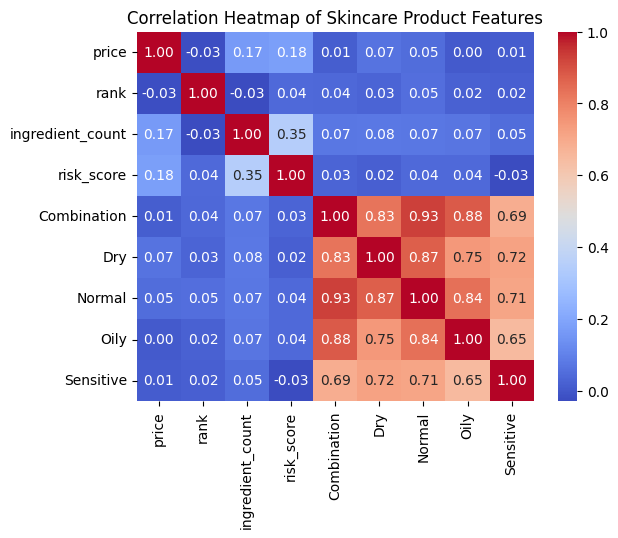

,price,rank,ingredient_count,risk_score,Combination,Dry,Normal,Oily,Sensitive
price,1.000000,-0.025215,0.166398,0.178915,0.012575,0.065525,0.049230,0.003978,0.007621
rank,-0.025215,1.000000,-0.029223,0.041444,0.036904,0.026982,0.051926,0.021041,0.015946
ingredient_count,0.166398,-0.029223,1.000000,0.346741,0.071404,0.078507,0.071535,0.068122,0.048562
risk_score,0.178915,0.041444,0.346741,1.000000,0.026860,0.016317,0.042501,0.041811,-0.029657
Combination,0.012575,0.036904,0.071404,0.026860,1.000000,0.830784,0.927966,0.882528,0.689316
Dry,0.065525,0.026982,0.078507,0.016317,0.830784,1.000000,0.874436,0.745767,0.722367
Normal,0.049230,0.051926,0.071535,0.042501,0.927966,0.874436,1.000000,0.835227,0.713320
Oily,0.003978,0.021041,0.068122,0.041811,0.882528,0.745767,0.835227,1.000000,0.648097
Sensitive,0.007621,0.015946,0.048562,-0.029657,0.689316,0.722367,0.713320,0.648097,1.000000


In [ ]:
# Section2: Analysis & Visuallization
# Correlation map of variables
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ["price", "rank", "ingredient_count", "risk_score",
                "Combination", "Dry", "Normal", "Oily", "Sensitive"]

corr = df_mart[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Skincare Product Features")
plt.show()

corr

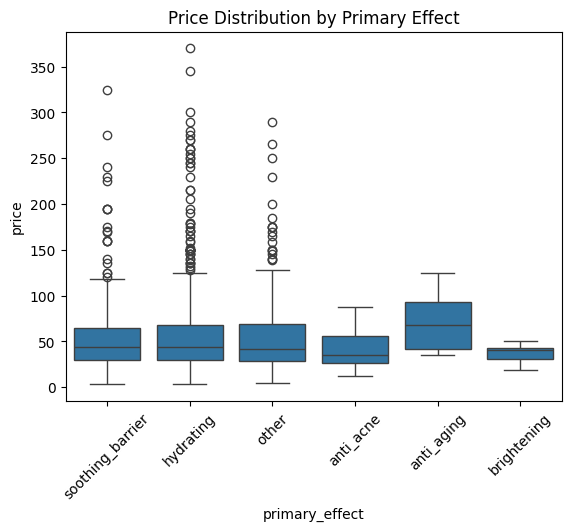

In [ ]:
# Boxplot of price and primary effect
sns.boxplot(data=df_mart, x="primary_effect", y="price")
plt.title("Price Distribution by Primary Effect")
plt.xticks(rotation=45)
plt.show()

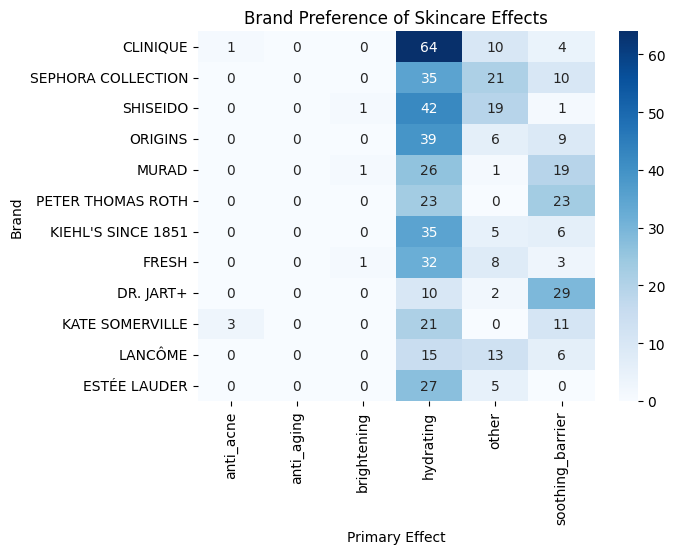

primary_effect,anti_acne,anti_aging,brightening,hydrating,other,soothing_barrier
brand,,,,,,
CLINIQUE,1,0,0,64,10,4
SEPHORA COLLECTION,0,0,0,35,21,10
SHISEIDO,0,0,1,42,19,1
ORIGINS,0,0,0,39,6,9
MURAD,0,0,1,26,1,19
PETER THOMAS ROTH,0,0,0,23,0,23
KIEHL'S SINCE 1851,0,0,0,35,5,6
FRESH,0,0,1,32,8,3
DR. JART+,0,0,0,10,2,29


In [ ]:
# Count primary effect per brand
brand_effect = pd.crosstab(df_mart["brand"], df_mart["primary_effect"])

# Only show the first 12 brands if there are too many of them
top_brands = brand_effect.sum(axis=1).sort_values(ascending=False).head(12).index
brand_effect_top = brand_effect.loc[top_brands]

sns.heatmap(brand_effect_top, cmap="Blues", annot=True, fmt="d")
plt.title("Brand Preference of Skincare Effects")
plt.ylabel("Brand")
plt.xlabel("Primary Effect")
plt.show()

brand_effect_top

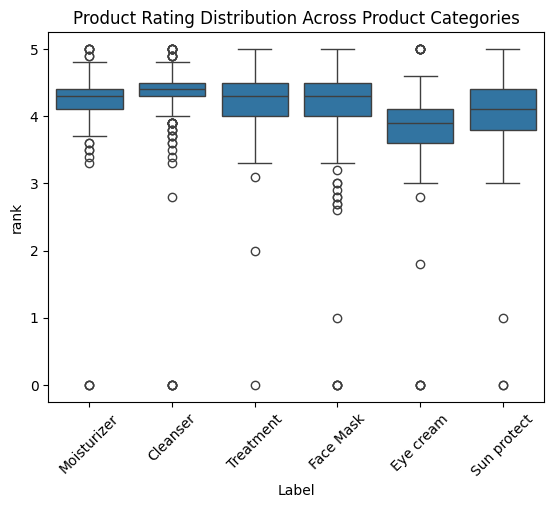

In [ ]:
# Product rating across categories
sns.boxplot(data=df_mart, x="Label", y="rank")
plt.xticks(rotation=45)
plt.title("Product Rating Distribution Across Product Categories")
plt.show()

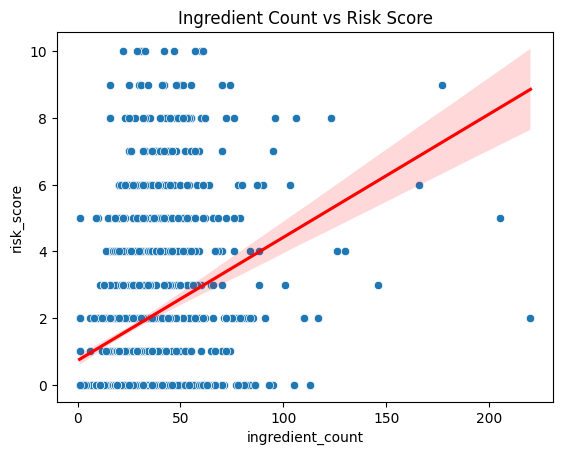

In [ ]:
# The relationship of ingredient counts and risk scores
sns.scatterplot(data=df_mart, x="ingredient_count", y="risk_score")
sns.regplot(data=df_mart, x="ingredient_count", y="risk_score", scatter=False, color="red")
plt.title("Ingredient Count vs Risk Score")
plt.show()

In [ ]:
# To test the recommendation function above: Example 1
rec_oily_sensitive = recommend_top_products(
    skin_type="Oily",
    target_effects=["hydrating", "soothing_barrier"],
    max_price=100,
    max_risk=3,
    top_n=10
)
rec_oily_sensitive

=== SkinMatch Recommendation ===
Skin type: Oily
Target effects: hydrating, soothing_barrier
Max price: 100
Max risk score: 3
Returned top 10 products.



,brand,Label,name,price,rank,primary_effect,risk_score,Combination,Dry,Normal,Oily,Sensitive
954,FOREO,Face Mask,Make My Day Hydrating & Anti-Pollution UFO™ Activated Mask,9,5.0,hydrating,0,1,1,1,1,1
1003,FOREO,Face Mask,H2Overdose Mask,19,5.0,soothing_barrier,0,1,1,1,1,1
1409,SUPERGOOP!,Sun protect,Invincible Setting Powder SPF 45 Refill,20,5.0,soothing_barrier,0,1,1,1,1,1
1017,DR ROEBUCK’S,Face Mask,Uluru Purifying Mask,28,5.0,hydrating,0,1,1,1,1,1
1458,COOLA,Sun protect,Sport Continuous Spray SPF 30 - Unscented,32,5.0,hydrating,0,1,1,1,1,1
194,CLINIQUE,Moisturizer,Limited Edition Dramatically Different™ Moisturizing Gel,39,5.0,hydrating,0,1,0,0,1,0
396,KIEHL'S SINCE 1851,Cleanser,Epidermal Re-Texturizing Micro-Dermabrasion,41,5.0,hydrating,0,1,1,1,1,0
1294,BIOEFFECT,Eye cream,EGF Eye Serum,90,5.0,hydrating,0,1,1,1,1,1
800,BEAUTYBIO,Treatment,The Nightly Retinol + Peptide Anti-Aging Serum,95,5.0,soothing_barrier,0,1,1,1,1,1
966,SEPHORA COLLECTION,Face Mask,Sleeping Mask - Coconut Water,4,5.0,hydrating,2,1,1,1,1,1


In [ ]:
# Example 2
rec_dry_antiaging = recommend_top_products(
    skin_type="Dry",
    target_effects=["anti_aging", "hydrating"],
    max_price=150,
    max_risk=None,
    top_n=10
)
rec_dry_antiaging

=== SkinMatch Recommendation ===
Skin type: Dry
Target effects: anti_aging, hydrating
Max price: 150
Returned top 10 products.



,brand,Label,name,price,rank,primary_effect,risk_score,Combination,Dry,Normal,Oily,Sensitive
954,FOREO,Face Mask,Make My Day Hydrating & Anti-Pollution UFO™ Activated Mask,9,5.0,hydrating,0,1,1,1,1,1
1017,DR ROEBUCK’S,Face Mask,Uluru Purifying Mask,28,5.0,hydrating,0,1,1,1,1,1
1458,COOLA,Sun protect,Sport Continuous Spray SPF 30 - Unscented,32,5.0,hydrating,0,1,1,1,1,1
396,KIEHL'S SINCE 1851,Cleanser,Epidermal Re-Texturizing Micro-Dermabrasion,41,5.0,hydrating,0,1,1,1,1,0
1294,BIOEFFECT,Eye cream,EGF Eye Serum,90,5.0,hydrating,0,1,1,1,1,1
966,SEPHORA COLLECTION,Face Mask,Sleeping Mask - Coconut Water,4,5.0,hydrating,2,1,1,1,1,1
1365,SHISEIDO,Sun protect,Ultimate Sun Protection Lotion WetForce SPF 50+ Mini,22,5.0,hydrating,2,1,1,1,1,1
244,LANEIGE,Moisturizer,Water Bank Dual Layer Face Oil,38,5.0,hydrating,2,1,1,1,0,0
1254,BEAUTYBIO,Eye cream,Bright Eyes Collagen-Infused Brightening Colloidal Silver Eye Masks,40,5.0,hydrating,2,1,1,1,1,1
785,ESTÉE LAUDER,Treatment,Perfectionist Pro Rapid Firm + Lift Treatment,75,5.0,hydrating,3,1,1,1,1,0


In [ ]:
# Example 3
rec_sensitive_lowrisk = recommend_top_products(
    skin_type="Sensitive",
    target_effects=["soothing_barrier"],
    max_price=None,
    max_risk=2,
    top_n=10
)
rec_sensitive_lowrisk

=== SkinMatch Recommendation ===
Skin type: Sensitive
Target effects: soothing_barrier
Max risk score: 2
Returned top 10 products.



,brand,Label,name,price,rank,primary_effect,risk_score,Combination,Dry,Normal,Oily,Sensitive
1003,FOREO,Face Mask,H2Overdose Mask,19,5.0,soothing_barrier,0,1,1,1,1,1
1409,SUPERGOOP!,Sun protect,Invincible Setting Powder SPF 45 Refill,20,5.0,soothing_barrier,0,1,1,1,1,1
800,BEAUTYBIO,Treatment,The Nightly Retinol + Peptide Anti-Aging Serum,95,5.0,soothing_barrier,0,1,1,1,1,1
974,SEPHORA COLLECTION,Face Mask,Sleeping Mask - Aloe Vera,4,5.0,soothing_barrier,2,1,1,1,1,1
638,MOON JUICE,Treatment,Beauty Shroom™ Exfoliating Acid Potion,39,4.9,soothing_barrier,2,1,1,1,1,1
51,YOUTH TO THE PEOPLE,Moisturizer,Adaptogen Deep Moisture Cream,58,4.8,soothing_barrier,0,1,1,1,1,1
391,IT COSMETICS,Cleanser,Confidence in a Cleanser™ Skin-Transforming Hydrating Cleansing Serum,28,4.7,soothing_barrier,0,1,1,1,1,1
119,BIOSSANCE,Moisturizer,Squalane + Omega Repair Cream,58,4.7,soothing_barrier,0,1,1,1,0,1
958,VOLITION BEAUTY,Face Mask,Detoxifying Silt Gelee Mask,60,4.7,soothing_barrier,0,1,1,1,1,1
320,AMOREPACIFIC,Cleanser,Treatment Enzyme Peel,60,4.7,soothing_barrier,2,1,1,1,1,1
